In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt #linear decision boundary

In [8]:
data=pd.read_csv('prob2data1.csv',names=['Exam1','Exam2','Admitted'])

In [9]:
data

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [10]:
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]

In [11]:
positive

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1
12,82.307053,76.481963,1
13,69.364589,97.718692,1
15,53.971052,89.207350,1
16,69.070144,52.740470,1


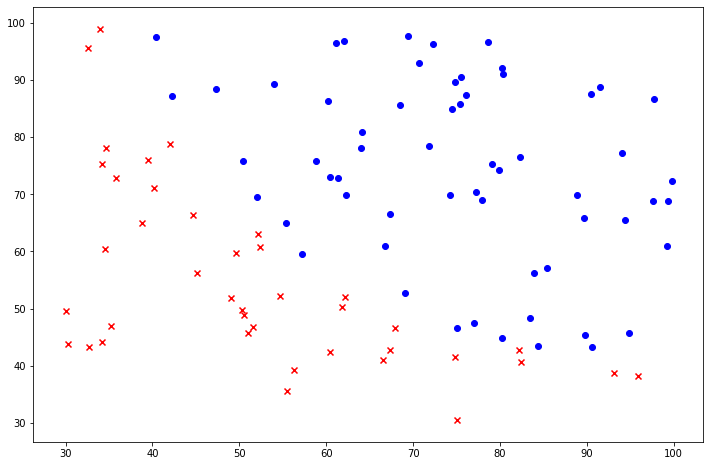

In [12]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],c='b',marker='o')
ax.scatter(negative['Exam1'],negative['Exam2'],c='r',marker='x')

In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
def cost(X,y,theta):
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [15]:
theta=np.matrix(np.array([0,0,0]))

In [16]:
X=data.iloc[:,0:2]

In [17]:
y=data.iloc[:,2:3]

In [18]:
X.insert(0,'Ones',1)

In [19]:
X=np.matrix(X)

In [20]:
y=np.matrix(y)

In [21]:
X.shape

(100, 3)

In [22]:
X

matrix([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644],
        [ 1.        , 45.08327748, 56.31637178],
        [ 1.        , 61.10666454, 96.51142588],
        [ 1.        , 75.02474557, 46.55401354],
        [ 1.        , 76.0987867 , 87.42056972],
        [ 1.        , 84.43281996, 43.53339331],
        [ 1.        , 95.86155507, 38.22527806],
        [ 1.        , 75.01365839, 30.60326323],
        [ 1.        , 82.30705337, 76.4819633 ],
        [ 1.        , 69.36458876, 97.71869196],
        [ 1.        , 39.53833914, 76.03681085],
        [ 1.        , 53.97105215, 89.20735014],
        [ 1.        , 69.07014406, 52.74046973],
        [ 1.        , 67.94685548, 46.67857411],
        [ 1.        , 70.66150955, 92.92713789],
        [ 1.        , 76.97878373, 47.57596365],
        [ 1.        

In [23]:
y.shape

(100, 1)

In [24]:
theta.shape

(1, 3)

In [25]:
cost(X,y,theta)

0.6931471805599453

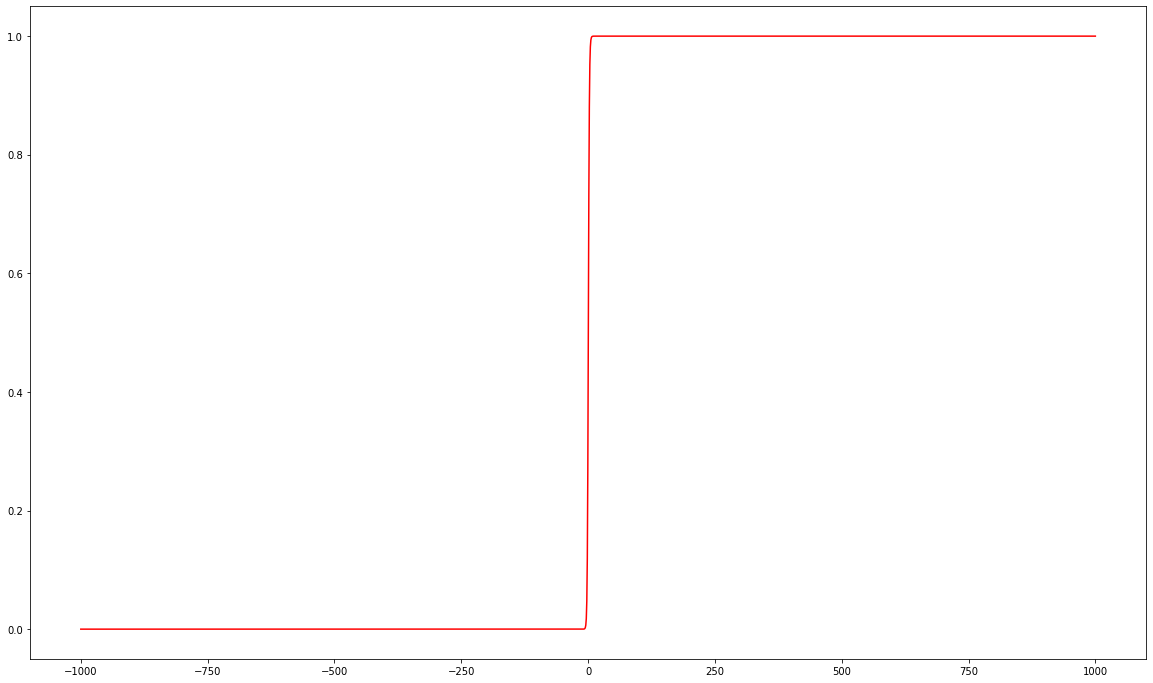

In [28]:
fig,ax=plt.subplots(figsize=(20,12))
myarr=np.zeros(2000)
for i in range(-1000,1000,1):
    myarr[i+1000]=sigmoid(i)
    #print(myarr[i])
ax.plot(np.linspace(-1000,1000,2000),myarr,'r')


In [40]:
def gradientDescent(X,y,theta,alpha,iterations):
    parameters=3
    c=np.zeros(iterations)
    temp=np.matrix(np.zeros(theta.shape))
    for i in range(iterations):
        error=sigmoid(X*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-np.sum(term)*(alpha/len(X))
        theta=temp
        c[i]=cost(X,y,theta)
    return theta,c

In [50]:
a,b=gradientDescent(X,y,theta,0.001,1000000)

In [55]:
a


matrix([[-15.39517866,   0.12825989,   0.12247929]])

In [51]:
b

array([0.69829069, 0.65971176, 0.66162727, ..., 0.22465422, 0.22465419,
       0.22465416])

In [53]:
ans=sigmoid(X*a.T)
right_count=0
for i in range(len(ans)):
    if ans[i]<0.5:
        ans[i]=0
    if ans[i]>0.5:
        ans[i]=1
    if ans[i]==y[i]:
        right_count+=1
print(right_count)  #100 values so right_count is percentage

89


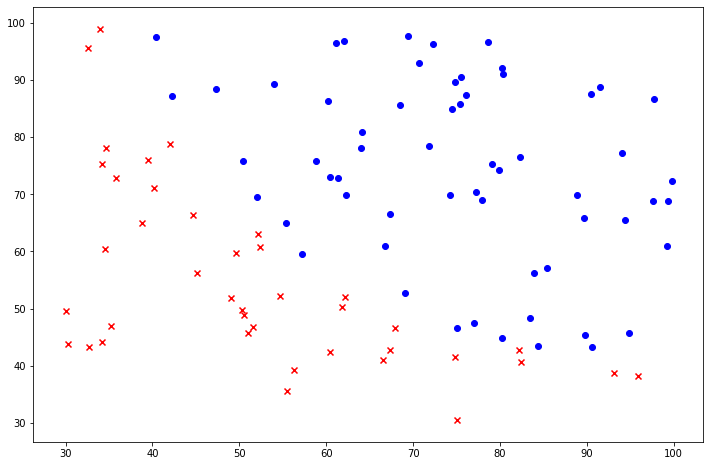

In [54]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],c='b',marker='o')
ax.scatter(negative['Exam1'],negative['Exam2'],c='r',marker='x')
